#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [1]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_11656\2329666743.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [2]:
ele = 40000;
t = np.linspace(0, 40, ele + 1)
g = 9.81;

m1 = 10 + 30;
d1 = 0;
k1 = 10000;

m2 = 350;
d2 = 0;
k2 = 700;

#create matrices M and K of zeroes and add values
M = np.zeros((2,2))
K = np.zeros((2,2))
M[0,0] = m1
M[1,1] = m2
K[0,0] = k1
K[0,1] = -k1
K[1,0] = -k1
K[1,1] = k1+k2

M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1+k2, -k2], [-k2, k2]])


#print matrices M and K
print('M = ')
print(M)
print('K = ')
print(K)

M = 
[[ 40   0]
 [  0 350]]
K = 
[[10700  -700]
 [ -700   700]]


#### Lastne vrednosti, lastni vektorji

In [3]:
A = np.linalg.inv(M) @ K

#eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print("eigenvalues")
print(eigenvalues)
print(" ")
print("eigenvectors")
print(eigenvectors)
print(" ")
eigenvectors2 = eigenvectors / eigenvectors[0,:]
print(f'normalized eigenvectors: \n {eigenvectors2}')
print(" ")
print("A")
print(A)

eigenvalues
[267.63176135   1.86823865]
 
eigenvectors
[[ 0.99997166  0.06573817]
 [-0.00752901  0.99783691]]
 
normalized eigenvectors: 
 [[ 1.00000000e+00  1.00000000e+00]
 [-7.52922011e-03  1.51789578e+01]]
 
A
[[267.5 -17.5]
 [ -2.    2. ]]


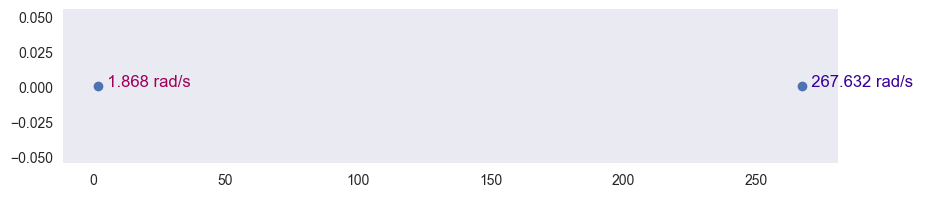

omega1 	 = 1.868 rad/s
omega2 	 = 267.632 rad/s


In [4]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
#shoe values as flaot with 2 decimal places
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[-1]
omega2 = eigenvalues[-2]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_11656\95736991.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


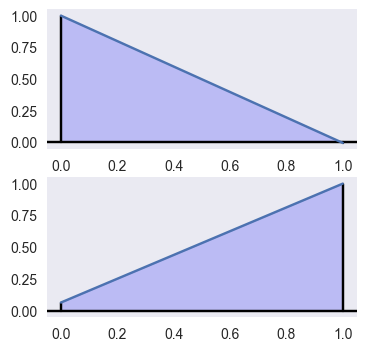

In [5]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])

plt.subplot(2,1,2)
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])



In [6]:
modal_mass2 = eigenvectors[:,0].T @ M @ eigenvectors[:,0]
modal_mass1 = eigenvectors[:,1].T @ M @ eigenvectors[:,1]

modal_stiffness2 = eigenvectors[:,0].T @ K @ eigenvectors[:,0]
modal_stiffness1 = eigenvectors[:,1].T @ K @ eigenvectors[:,1]

print(f'M1  = {modal_mass1:.3f} kg')
print(f'M2  = {modal_mass2:.3f} kg')
print(" ")
print(f'K1  = {modal_stiffness1:.3f} N/m')
print(f'K2  = {modal_stiffness2:.3f} N/m')

M1  = 348.660 kg
M2  = 40.018 kg
 
K1  = 651.381 N/m
K2  = 10709.973 N/m


In [7]:
modal_mass_matrix = np.zeros((2,2))

for i in range(2):
    modal_mass_matrix[i,i] = eigenvectors[:,i].T @ M @ eigenvectors[:,i]
print("Modal mass matrix: ")
print(modal_mass_matrix)

Modal mass matrix: 
[[ 40.01757264   0.        ]
 [  0.         348.66033283]]


In [8]:
modal_stiffness_matrix = np.zeros((2,2))

for i in range(2):
    modal_stiffness_matrix[i,i] = eigenvectors[:,i].T @ K @ eigenvectors[:,i]
print("Modal stiffness matrix: ")
print(modal_stiffness_matrix)

Modal stiffness matrix: 
[[10709.97345122     0.        ]
 [    0.           651.38070884]]


Preverjanje $\omega_1$ in $\omega_2$

In [9]:
omega11 = np.sqrt(modal_stiffness_matrix[-1,-1]/modal_mass_matrix[-1,-1])
omega22 = np.sqrt(modal_stiffness_matrix[-2,-2]/modal_mass_matrix[-2,-2])

print(f'modal stiffness 1 \t = \t{modal_stiffness_matrix[-1,-1]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_matrix[-1,-1]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_matrix[-2,-2]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_matrix[-2,-2]:.2f}')
print(f'omega2 \t\t\t = \t{omega2:.2f} rad/s')

modal stiffness 1 	 = 	651.381 N/m
modal mass 1 		 = 	348.66 kg
omega1 			 = 	1.37 rad/s
 
modal stiffness 2 	 = 	10709.973
modal mass 2 		 = 	40.02
omega2 			 = 	267.63 rad/s


In [10]:
C = np.zeros((2))
phi = np.zeros((2))

C1 = 0;
C2 = 0;

C[0] = C1;
C[1] = C2;

phi1 = 0 * np.pi/180;
phi2 = 0 * np.pi/180;

phi[0] = phi1;
phi[1] = phi2;

## Definicija vzbujanja

(-0.1, 0.3)

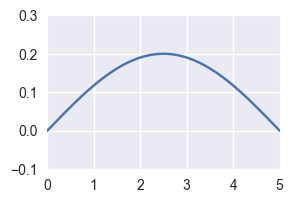

In [11]:
y = 0.2 * np.sin(2 * np.pi * 0.1 * t)
plt.figure(figsize=(3,2))
plt.plot(t, y)
plt.xlim(0, 5)
plt.ylim(-0.1, 0.3)

In [12]:
t[1250]

1.25

t0 = 4.00 s


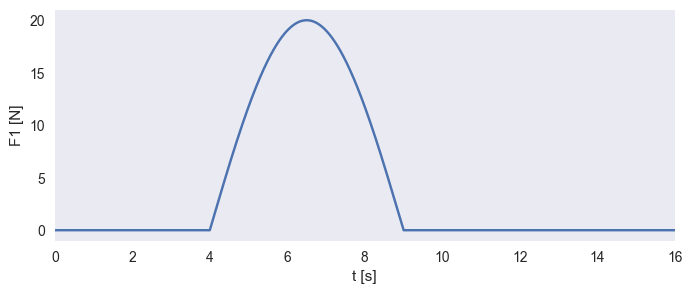

In [13]:
t0 = t[4000]
t0_i = np.argmin(np.abs(t - t0))

print(f't0 = {t0:.2f} s')
F = np.zeros_like(t)
F0 = 100; #N

#F2
F2 = np.zeros_like(t);
F2[4000:9000] = y[:5000] * 100

#plot F1
plt.figure(figsize=(8,3))
#range axis
plt.xlim(0, 16)
#axis labels
plt.xlabel('t [s]')
plt.ylabel('F1 [N]')
plt.plot(t, F2)
plt.grid()

In [14]:
#create vector Ft with two rows and add F1 to the first row
Ft = np.zeros((2, len(t)))
Ft[0,:] = F2

In [15]:
print("eigenvectors: ")
print(eigenvectors)
print(" ")
print("eigenvectors.T: ")
print(eigenvectors.T)

eigenvectors: 
[[ 0.99997166  0.06573817]
 [-0.00752901  0.99783691]]
 
eigenvectors.T: 
[[ 0.99997166 -0.00752901]
 [ 0.06573817  0.99783691]]


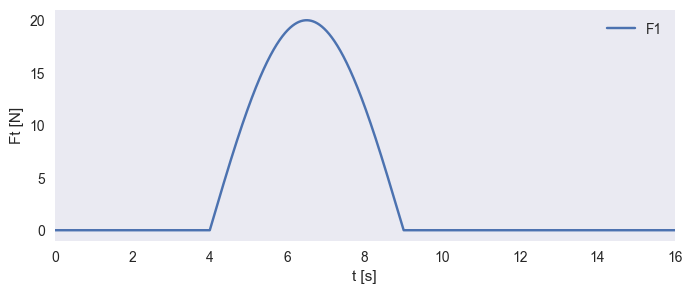

In [16]:
#plot Ft
plt.figure(figsize=(8,3))
#range axis
plt.xlim(0, 16)
#axis labels
plt.xlabel('t [s]')
plt.ylabel('Ft [N]')
plt.plot(t, Ft[0])
plt.legend(['F1', 'F2'])
plt.grid()

In [18]:
Modal_Ft = eigenvectors.T @ Ft
Modal_Ft[:, :5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
# d_krit1 = np.sqrt(k1/m1)
delta1 = 0.10;
delta2 = 0.02;

## Konvolucija

In [20]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)

print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1D = 1.86 rad/s
omega2D = 267.58 rad/s


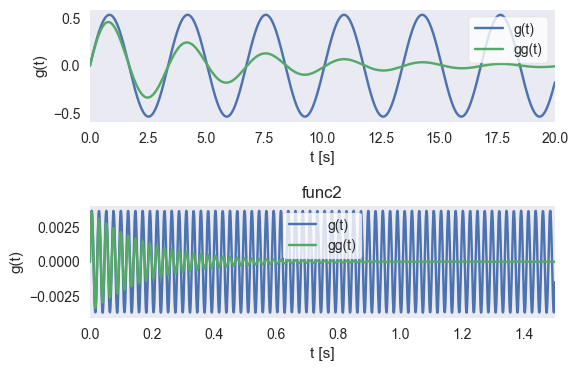

In [21]:
g_func1 = 1/omega1 * np.sin(omega1 * t)
g_func2 = 1/omega2 * np.sin(omega2 * t)

gg_func1 = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
gg_func2 = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func1)
plt.plot(t, gg_func1) 
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("func2")
plt.xlim(0, 1.5)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func2)
plt.plot(t, gg_func2)
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$ in začetni pogoji

In [22]:
#eta1
eta1 = np.convolve(Modal_Ft[0,:], g_func1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2 = np.convolve(Modal_Ft[1,:], g_func2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], gg_func2) * (t[1] - t[0])
eta2[:5]
print(f'size of eta2: {eta2.size}')

size of eta2: 80001


In [24]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

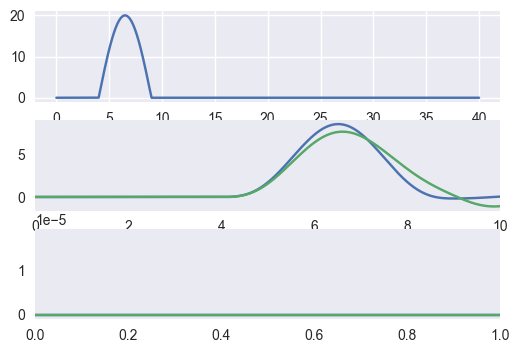

In [25]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.subplot(3,1,2)
plt.xlim(0, 10)
plt.plot(t, eta1[:ele+1])
plt.plot(t, eta1d[:ele+1])
plt.grid()
plt.subplot(3,1,3)
plt.xlim(0, 1)
plt.plot(t, eta2[:ele+1])
plt.plot(t, eta2d[:ele+1])
plt.grid()


### Iz modalnega prostora nazaj v realnega

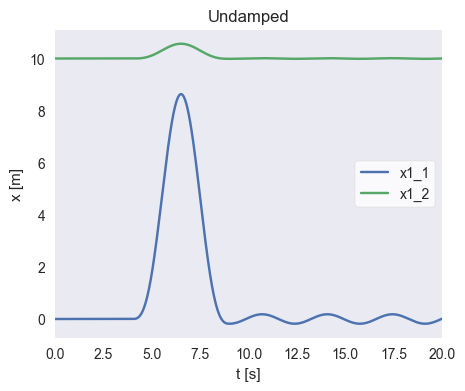

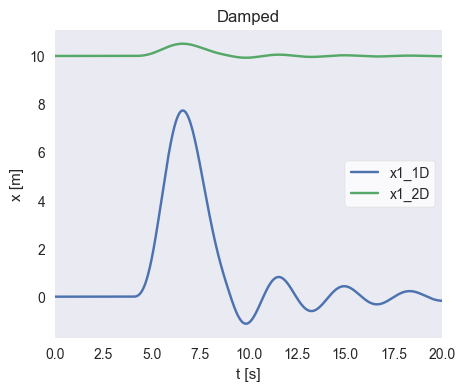

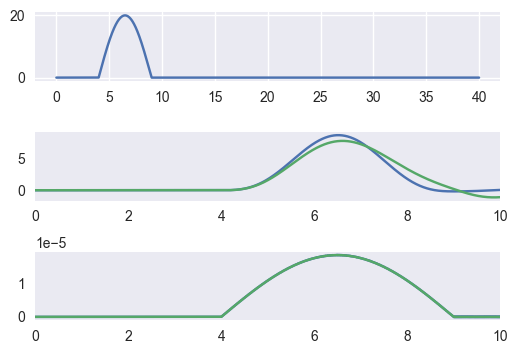

In [28]:
v_pom = 10
x1_1 = eigenvectors[:,0] @ eta
x1_2 = eigenvectors[:,1] @ eta

x1_1D = eigenvectors[:,0] @ etaD
x1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title("Undamped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1[:len(t)])
plt.plot(t, v_pom + x1_2[:len(t)])
plt.grid()
plt.legend(['x1_1', 'x1_2'], frameon=True, facecolor='white')

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.title("Damped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1D[:len(t)])
plt.plot(t, v_pom + x1_2D[:len(t)])
plt.grid()
plt.legend(['x1_1D', 'x1_2D'], frameon=True, facecolor='white')

#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.subplot(3,1,2)
plt.xlim(0, 10)
plt.subplots_adjust(hspace=0.75)
plt.plot(t, eta1[:ele+1])
plt.plot(t, eta1d[:ele+1])
plt.grid()
plt.subplots_adjust(hspace=0.75)
plt.subplot(3,1,3)
plt.xlim(0, 10)
plt.plot(t, eta2[:ele+1])
plt.plot(t, eta2d[:ele+1])
plt.grid()


In [ ]:
#plot x1_1D and x1_2D on single plot


In [ ]:
print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1D = 1.85 rad/s
omega2D = 267.30 rad/s


In [ ]:
#Ft2[0][2000:2005]
print("Modal_Ft2 [0]: ")
print(Modal_Ft2[0][2000:2005])
print(" ")
print("Modal_Ft2 [1]: ")
print(Modal_Ft2[1][2000:2005])
#plt.plot(t, Ft2[0])

Modal_Ft2 [0]: 
[0. 0. 0. 0. 0.]
 
Modal_Ft2 [1]: 
[0. 0. 0. 0. 0.]


In [ ]:
#eta1
eta2_1 = np.convolve(Modal_Ft2[0,:], g_func1) * (t[1] - t[0])
eta2_12 = np.convolve(Modal_Ft2[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2_2 = np.convolve(Modal_Ft2[1,:], g_func2) * (t[1] - t[0])
eta2_22 = np.convolve(Modal_Ft2[1,:], gg_func2) * (t[1] - t[0])
eta2[:5]


array([0.00000000e+00, 6.49562070e-06, 1.90211245e-05, 3.66814446e-05,
       5.82159141e-05])

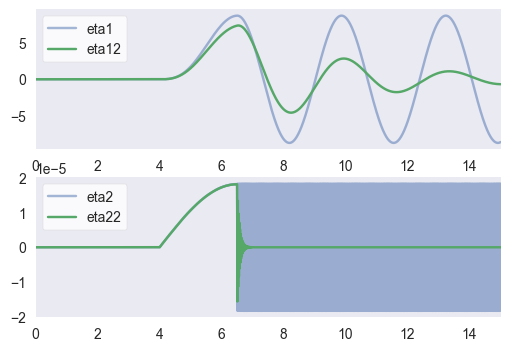

In [ ]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))
#range axis
plt.subplot(2,1,1)
plt.xlim(0, 15)
plt.plot(t, eta2_1[:ele+1], alpha=0.5)
plt.plot(t, eta2_12[:ele+1])
plt.grid()
plt.legend(['eta1', 'eta12'], frameon=True, facecolor='white')


plt.subplot(2,1,2)
plt.xlim(0, 15)
plt.plot(t, eta2_2[:ele+1], alpha=0.5)
plt.plot(t, eta2_22[:ele+1])
plt.legend(['eta2', 'eta22'], frameon=True, facecolor='white')
plt.grid()

In [ ]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta2_2 = np.zeros((2, 2*len(t) - 1))
eta2_2[0,:] = eta1
eta2_2[1,:] = eta2

etaD2 = np.zeros((2, 2*len(t) - 1))
etaD2[0,:] = eta12
etaD2[1,:] = eta22

In [ ]:
v_pom = 50
x2_1 = eigenvectors[:,0] @ eta_2
x2_2 = eigenvectors[:,1] @ eta_2

x12_1D = eigenvectors[:,0] @ etaD2
x2_2D = eigenvectors[:,1] @ etaD2



#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title("Undamped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x2_1[:len(t)])
plt.plot(t, v_pom + x2_2[:len(t)])
plt.grid()
plt.legend(['x1_1', 'x1_2'], frameon=True, facecolor='white')

#plot x2_1D and x2_2D
plt.figure(figsize=(5,4))
plt.title("Damped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x2_1D[:len(t)])
plt.plot(t, v_pom + x2_2D[:len(t)])
plt.grid()
plt.legend(['x1_1D', 'x1_2D'], frameon=True, facecolor='white')

#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft2[0])
plt.subplot(3,1,2)
plt.xlim(0, 15)
plt.plot(t, eta2_1[:ele+1])
plt.plot(t, eta2_12[:ele+1])
plt.grid()
plt.subplot(3,1,3)
plt.xlim(0, 15)
plt.plot(t, eta2_2[:ele+1])
plt.plot(t, eta2_22[:ele+1])
plt.grid()


NameError: name 'eta_2' is not defined